In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dgi = pd.read_csv('dgi_2023.csv')

In [3]:
dgi.head()

,Unnamed: 0,Country,Digital by Design,Data-driven public sector,Government as a Platform,Open by Default,Use-Driven,Proactiveness,Composite Score
0,0,KOR,0.971,1.000,0.913,0.868,0.909,0.934,0.935
1,1,DNK,0.851,0.833,0.896,0.783,0.715,0.788,0.811
2,2,GBR,0.914,0.698,0.696,0.667,0.925,0.853,0.775
3,3,NOR,0.758,0.851,0.818,0.568,0.853,0.750,0.770
4,4,AUS,0.973,0.774,0.738,0.466,0.833,0.736,0.753


In [4]:
dgi_oecd = dgi[dgi['Country'] == 'OECD'].reset_index(drop=True)

In [5]:
dgi_oecd

,Unnamed: 0,Country,Digital by Design,Data-driven public sector,Government as a Platform,Open by Default,Use-Driven,Proactiveness,Composite Score
0,14,OECD,0.684,0.633,0.615,0.525,0.607,0.567,0.605


In [6]:
dgi_brasil = dgi[dgi['Country'] == 'BRA'].reset_index(drop=True)

In [7]:
dgi_brasil

,Unnamed: 0,Country,Digital by Design,Data-driven public sector,Government as a Platform,Open by Default,Use-Driven,Proactiveness,Composite Score
0,35,BRA,0.622,0.628,0.645,0.522,0.639,0.658,0.619


In [8]:
df = pd.concat([dgi_brasil, dgi_oecd])

In [9]:
df

,Unnamed: 0,Country,Digital by Design,Data-driven public sector,Government as a Platform,Open by Default,Use-Driven,Proactiveness,Composite Score
0,35,BRA,0.622,0.628,0.645,0.522,0.639,0.658,0.619
0,14,OECD,0.684,0.633,0.615,0.525,0.607,0.567,0.605


In [10]:
df = df.melt(
    id_vars='Country',
    value_vars=[
        'Digital by Design',
        'Data-driven public sector',
        'Government as a Platform',	
        'Open by Default',	
        'Use-Driven',	
        'Proactiveness',
        'Composite Score'
    ],
    var_name='Dimensoes', 
    value_name='Valores'
)

In [11]:
df

,Country,Dimensoes,Valores
0,BRA,Digital by Design,0.622
1,OECD,Digital by Design,0.684
2,BRA,Data-driven public sector,0.628
3,OECD,Data-driven public sector,0.633
4,BRA,Government as a Platform,0.645
5,OECD,Government as a Platform,0.615
6,BRA,Open by Default,0.522
7,OECD,Open by Default,0.525
8,BRA,Use-Driven,0.639
9,OECD,Use-Driven,0.607


In [12]:
df['Country'] = df['Country'].replace({
    'OECD': 'OCDE',
    'BRA': 'Brasil'
})

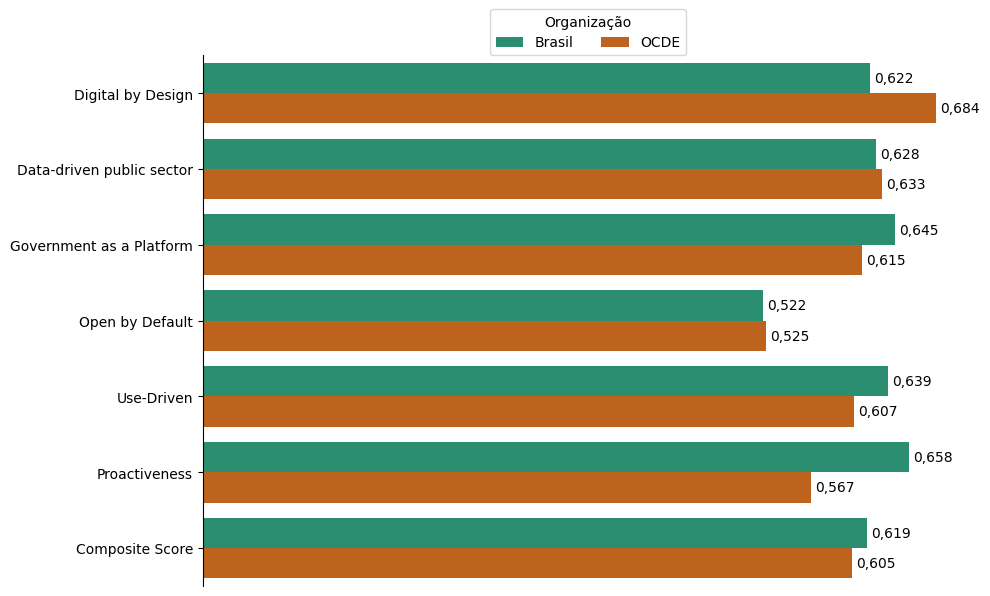

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

bar = sns.barplot(df, y='Dimensoes', x='Valores', hue='Country', palette='Dark2')

for containter in bar.containers:
    ax.bar_label(containter, fmt=lambda x: f'{x:.3f}'.replace('.', ','), padding=3)

ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_visible(False)
ax.legend(title='Organização', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=2)
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Dissertacao-Mestrado-PoderJud-EGDI/figuras/comparacao_dgi_brasil_mundo_2023.png', dpi=300, bbox_inches='tight')
plt.show()